<a href="https://colab.research.google.com/github/masterinfo/COURS_ELEARNING/blob/master/mobilenet_facial_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mobilenet facial recognition

MobileNet-v2 is a convolutional neural network that is 53 layers deep. You can load a pretrained version of the network trained on more than a million images from the ImageNet database [1]. The pretrained network can classify images into 1000 object categories, such as keyboard, mouse, pencil, and many animals.

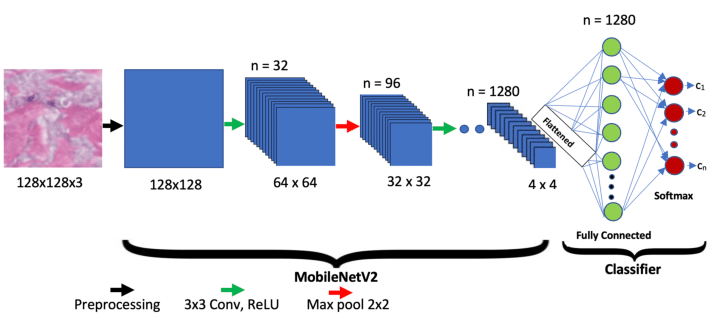

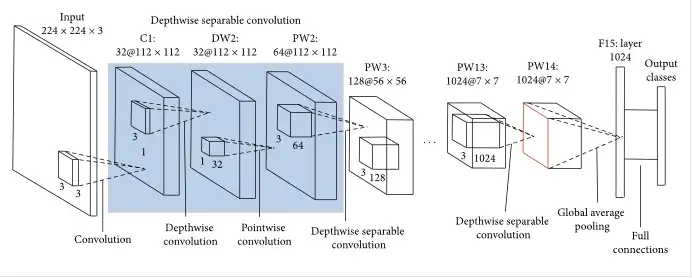

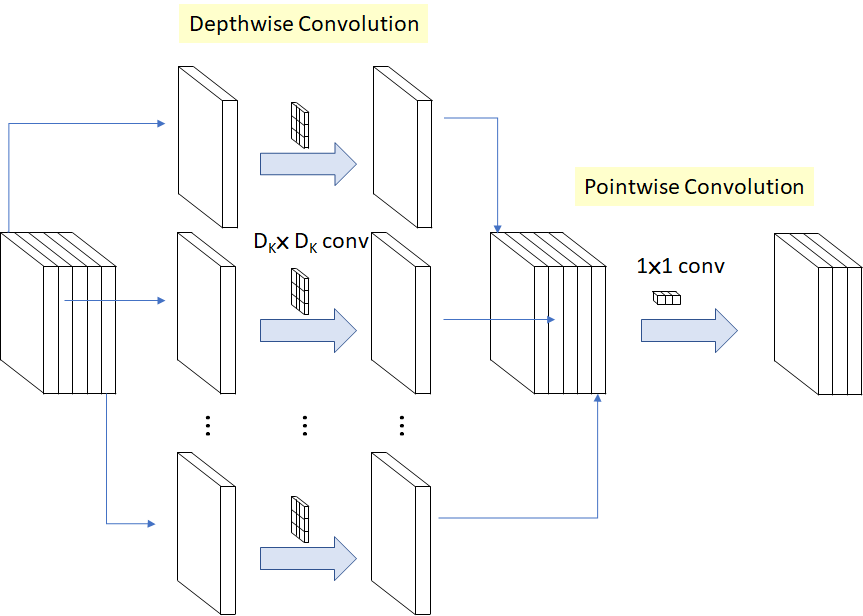

Depthwise separable convolution is a depthwise convolution followed by a pointwise convolution as follows:
    Depthwise convolution is the channel-wise DK×DK spatial convolution. Suppose in the figure above, we have 5 channels, then we will have 5 DK×DK spatial convolution.
    Pointwise convolution actually is the 1×1 convolution to change the dimension.

https://www.youtube.com/watch?v=KTB_OFoAQcc

**Depthwise separable convolution**

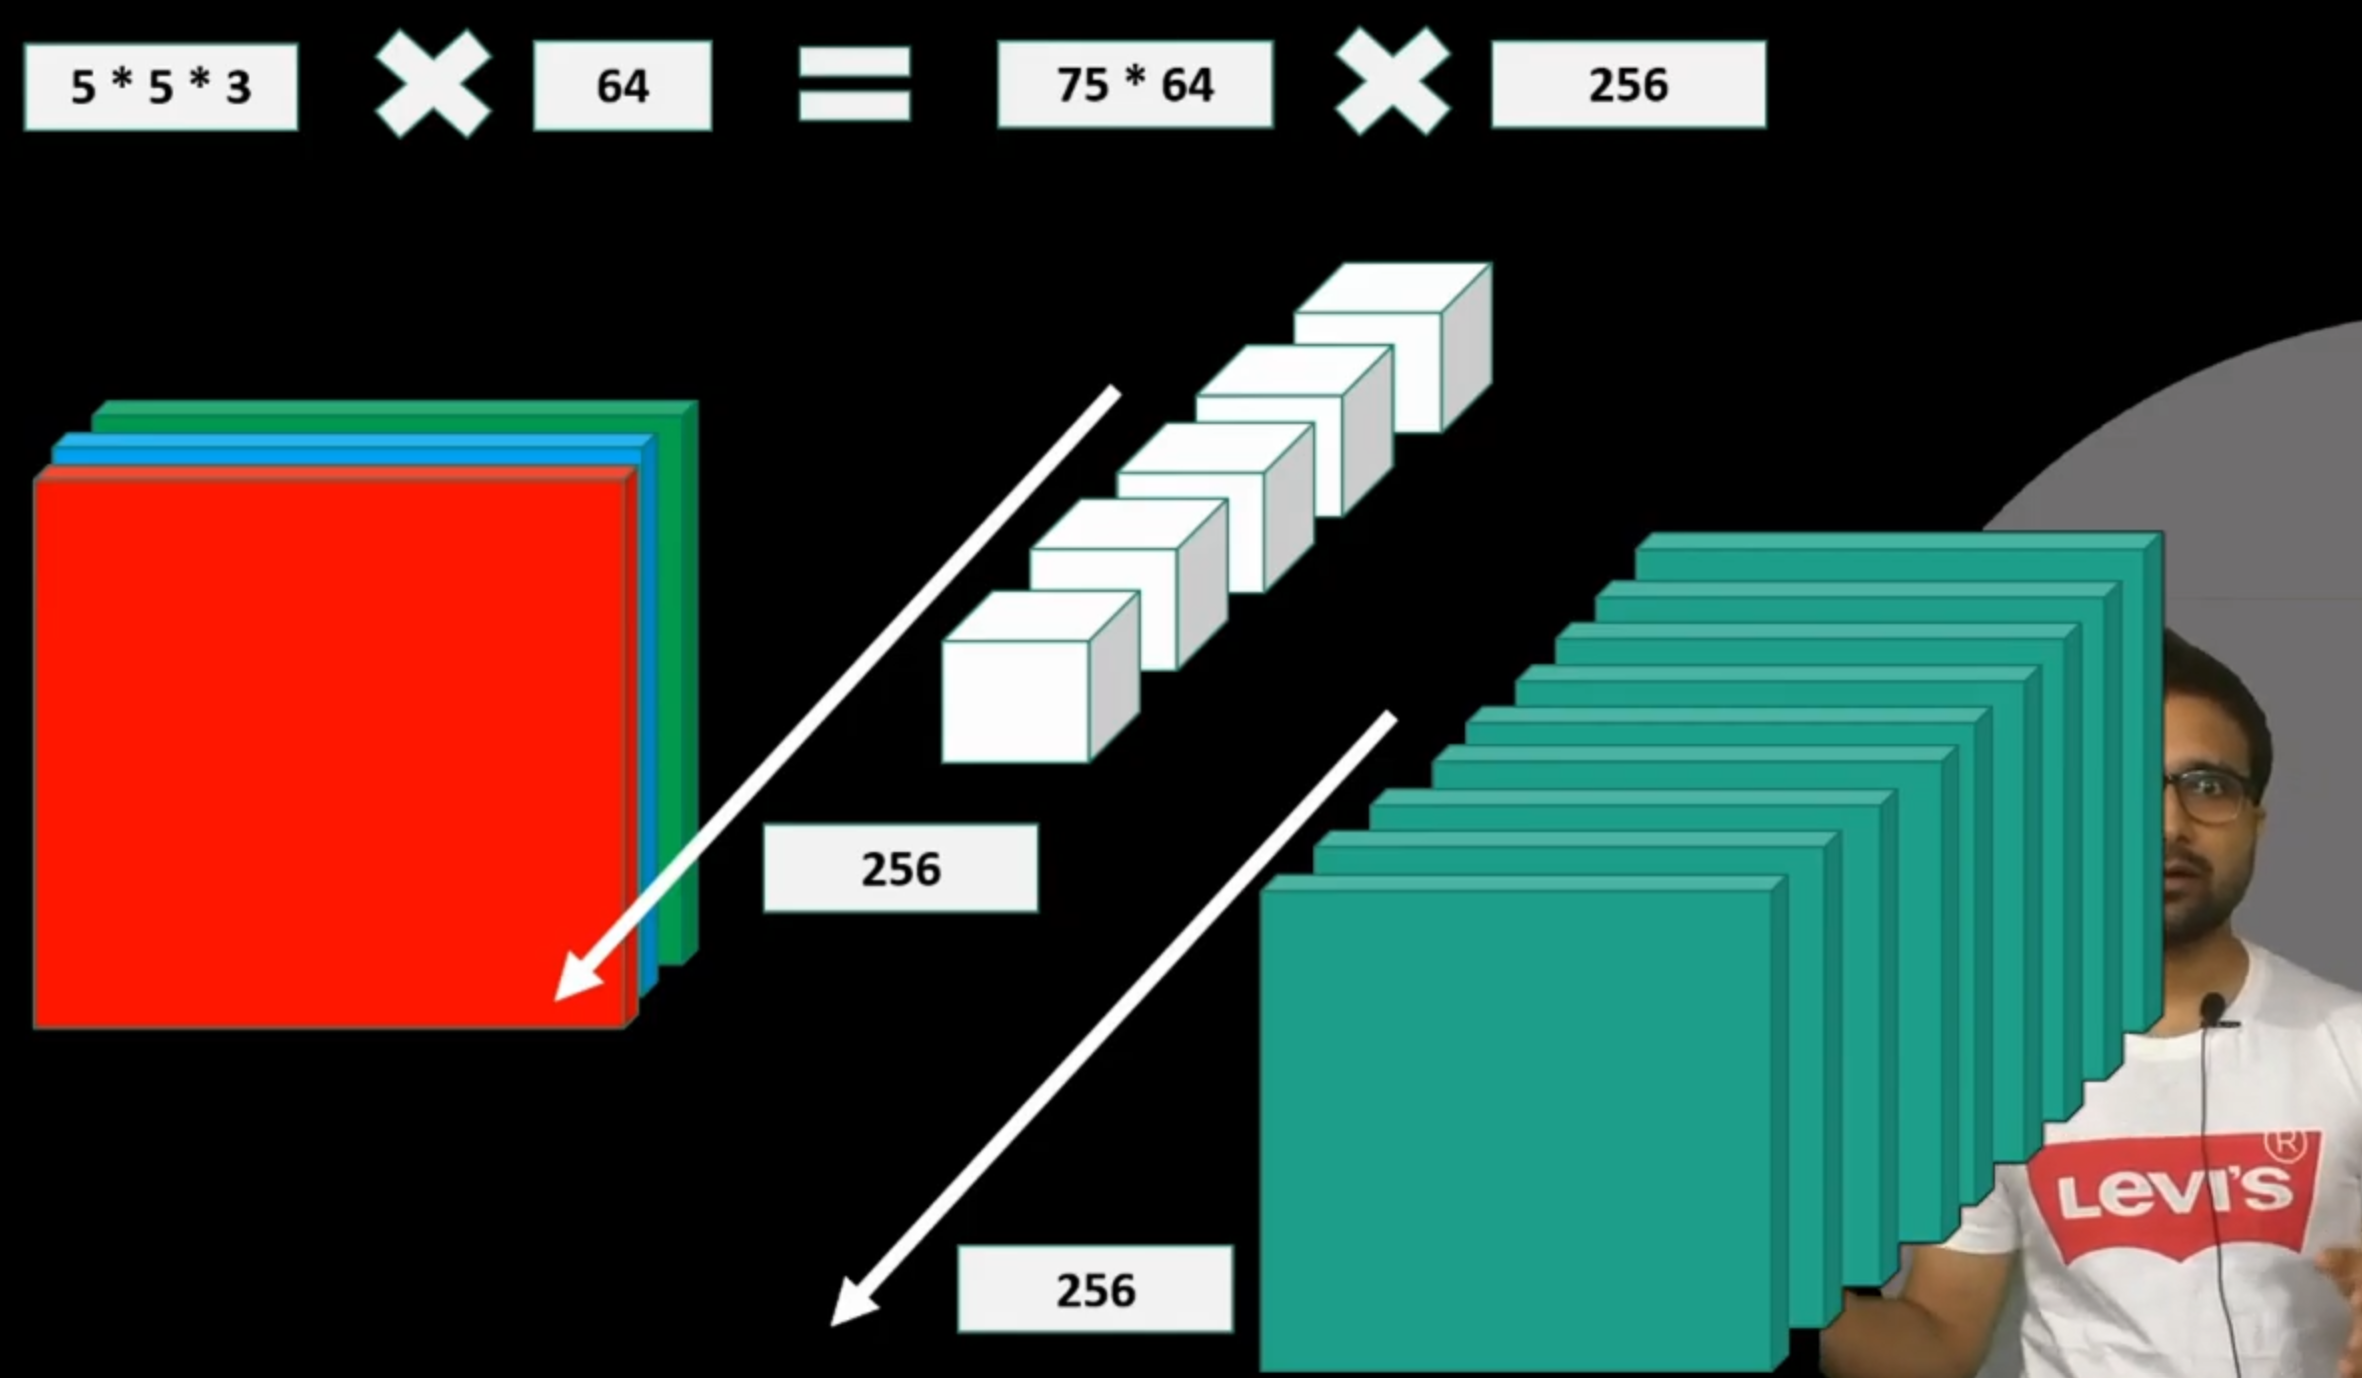

https://www.youtube.com/watch?v=vfCvmenkbZA&t=112s

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt

In [2]:
train_dir = "/content/drive/My Drive/archiveFacial/train/" #passing the path with training images
test_dir = "/content/drive/My Drive/archiveFacial/test/"   #passing the path with testing images

In [3]:
classes=os.listdir("/content/drive/My Drive/archiveFacial/train" )
classes

['disgust', 'fear', 'angry', 'happy', 'sad', 'surprise', 'neutral']

In [4]:
train_count = []
train_dict={}
test_count = []
test_dict ={}
# avg_of_train_data=0
# avg_of_test_data=0

def test_train_distribution():
  print("Train Set :")

  

  for folder in os.listdir(train_dir) :
      # print(folder, "folder contains:", len(os.listdir(train_dir+folder)), "image")
      train_count.append(len(os.listdir(train_dir+folder)))
      train_dict[folder]=len(os.listdir(train_dir+folder))
  avg_of_train_data=sum(train_count)/len(train_count)
  print(train_dict)
  print("Avgerage dataset len should be ~",round(avg_of_train_data))    
  print()

  #####################test##################

  
  print("Test Set :")
  


  for folder in os.listdir(test_dir) :
      # print(folder, "folder contains:", len(os.listdir(test_dir+folder)), "images")
      test_count.append(len(os.listdir(test_dir+folder)))
      test_dict[folder]=len(os.listdir(test_dir+folder))
  avg_of_test_data=sum(test_count)/len(test_count)
  print("Avgerage dataset len should be ~",round(avg_of_test_data)) 

  print(test_dict)
test_train_distribution()

Train Set :
{'disgust': 436, 'fear': 4097, 'angry': 4000, 'happy': 7215, 'sad': 4830, 'surprise': 3171, 'neutral': 4965}
Avgerage dataset len should be ~ 4102

Test Set :
Avgerage dataset len should be ~ 1025
{'fear': 1024, 'angry': 958, 'surprise': 831, 'happy': 1774, 'disgust': 111, 'sad': 1247, 'neutral': 1233}


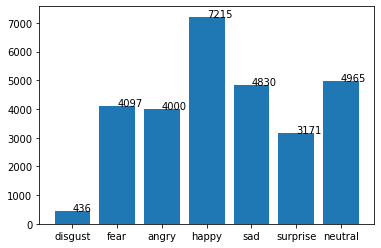

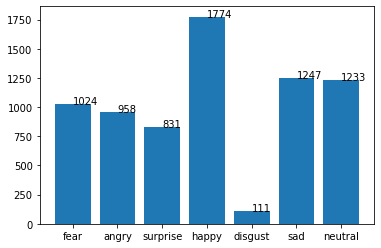

In [5]:
def plot_data_dist(dictn):
  def addlabels(x,y):
      for i in range(len(x)):
          plt.text(i,y[i],y[i])


  names = list(dictn.keys())
  values = list(dictn.values())
  addlabels(names,values)

  plt.bar(range(len(dictn)), values, tick_label=names)
  plt.show()

plot_data_dist(train_dict)
plot_data_dist(test_dict)

In [6]:
#averages of train test sets
avg_of_train_data=round(sum(train_count)/len(train_count))
avg_of_test_data=round(sum(test_count)/len(test_count))

In [7]:


avg_of_train_data,avg_of_test_data
#average of test train



(4102, 1025)

In [8]:
#Definnig a function to do so 
def grayscale_RGB_and_upsizing(image,size=[224,224]):
    # image = tf.image.grayscale_to_rgb(tf.convert_to_tensor(image))
    image = tf.image.resize(tf.convert_to_tensor(image), size)

    return image

In [9]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPool2D,Conv2D,Dropout,MaxPooling2D,BatchNormalization
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

In [10]:
# train_datagen=ImageDataGenerator(rescale=1/255)
# test_datagen=ImageDataGenerator(rescale=1/255)

train_datagen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,preprocessing_function=grayscale_RGB_and_upsizing)
test_datagen=ImageDataGenerator(rescale=1/255,preprocessing_function=grayscale_RGB_and_upsizing)

In [11]:
train_set=train_datagen.flow_from_directory(train_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                    
                                             class_mode='categorical')
test_set=test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             
                                             class_mode='categorical')

Found 28714 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [12]:
# See the shape of any data
train_sample=next(train_set)
print(train_sample[0].shape)

(32, 224, 224, 3)


In [13]:
train_set.class_indices
#Optional list of class subdirectories (e.g. ['dogs','cats']).
# Default: None. If not provided, the list of classes will be automatically 
#inferred from the subdirectory names/structure under directory

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [14]:
model=tf.keras.applications.MobileNetV2()

14536120/14536120 [==============================] - 2s 0us/step


In [15]:
# model.summary()
#Removing last layer 
ip=model.layers[0].input
op=model.layers[-2].output
op

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [16]:
#adding last layers 
final_output=keras.layers.Dense(128)(op)
final_output=keras.layers.Activation('relu')(final_output)
final_output=keras.layers.Dense(64)(final_output)
final_output=keras.layers.Activation('relu')(final_output)
final_output=keras.layers.Dense(7,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [17]:
new_model=keras.Model(inputs =ip,outputs=final_output)

In [18]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [19]:
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#'categorical_crossentropy': to find loss in multiclass classification with OHE output
#optimizer ! 
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
early=EarlyStopping(monitor='val_accuracy',patience=3,restore_best_weights=True,verbose=1,min_delta=0.001)

In [21]:
history=new_model.fit(train_set,epochs=50,validation_data=test_set,batch_size=32)
#epochs times forward <> back prop. for all rows .
#last accuracy 71% 12/09 9:35
#last accuracy 70.1% 14/09 11:20 epo=10
#last accuracy 89.1% 14/09 12:00 epo=50 (by mistake ran with same model)
#last accuracy loss: 0.1167 - accuracy: 0.9625 - val_loss: 1.6983 - val_accuracy: 0.5152
#last accuracy loss : loss: 0.9590 - accuracy: 0.6396 - val_loss: 1.6662 - val_accuracy: 0.4850 15/09/ 9:24 AM epo=10

Epoch 1/50
898/898 [==============================] - 22215s 25s/step - loss: 1.2999 - accuracy: 0.5068 - val_loss: 3.4585 - val_accuracy: 0.3714
Epoch 2/50
898/898 [==============================] - 531s 591ms/step - loss: 1.1283 - accuracy: 0.5783 - val_loss: 4.7423 - val_accuracy: 0.1812
Epoch 3/50
898/898 [==============================] - 533s 594ms/step - loss: 1.0665 - accuracy: 0.6011 - val_loss: 2.1871 - val_accuracy: 0.3292
Epoch 4/50
898/898 [==============================] - 534s 595ms/step - loss: 1.0282 - accuracy: 0.6153 - val_loss: 1.9949 - val_accuracy: 0.5003
Epoch 5/50
898/898 [==============================] - 532s 592ms/step - loss: 0.9948 - accuracy: 0.6266 - val_loss: 2.7320 - val_accuracy: 0.3261
Epoch 6/50
898/898 [==============================] - 532s 592ms/step - loss: 0.9632 - accuracy: 0.6384 - val_loss: 2.0926 - val_accuracy: 0.4677
Epoch 7/50
898/898 [==============================] - 530s 590ms/step - loss: 0.9378 - accuracy: 0.6509 - val_loss: 1.1589 -

In [40]:
new_model.save('/content/drive/My Drive/model_recognition_weights.h5')

In [33]:
from keras.models import load_model


In [41]:
model=load_model("/content/drive/My Drive/model_recognition_weights.h5")

In [42]:
x_test,y_test = next(test_set)
predict = model.predict(x_test)

1/1 [==============================] - 1s 668ms/step


In [ ]:
predict

In [43]:
predict.shape

(32, 7)

1/1 [==============================] - 0s 37ms/step


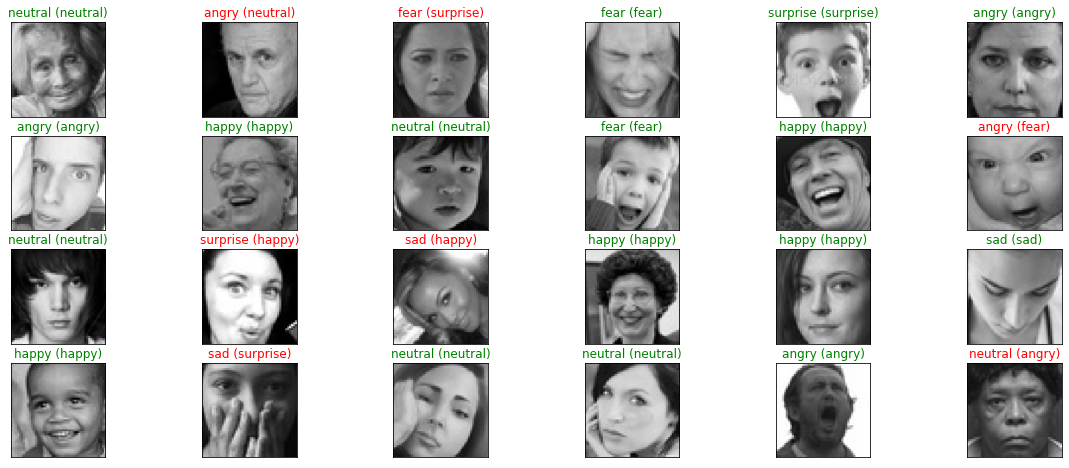

In [44]:
x_test,y_test = next(test_set)
predict = model.predict(x_test)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=24, replace=False)):
  ax = figure.add_subplot(4, 6, i + 1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_test[index]))#squeezed [ndarray] The input array, but with all or a subset of the dimensions of length 1 removed. This is always a itself or a view into arr.
  predict_index = class_labels[(np.argmax(predict[index]))]
  true_index = class_labels[(np.argmax(y_test[index]))]
  ax.set_title("{} ({})".format((predict_index),(true_index)),color=("green" if predict_index == true_index else "red"))

plt.show()